# Algorithm Theoretical Basis Document: Algorithms to Validate NISAR L2 Coseismic, Transient and Secular Displacement Requirements

*Revision 14*

*January 31, 2021*

*NISAR Solid Earth Team*

<hr/>

## 1.1 Motivation: Secular Velocities
The measurement of secular velocities plays an essential role in our understanding of fundamental processes associated with tectonic deformation and post-glacial rebound, along with many other gradual and steady processes that deform the Earth’s surface. Secular velocities in the context of NISAR also refer to the approximately constant velocity fields for other applications with time scales exceeding the operational lifetime of the mission.

## 2.1 Requirements
**L2 Requirement 658 - Secular Deformation Rates:** *Over three years, the NISAR project shall measure at least two components of the spatially and temporally averaged relative vector velocities over active regions of Earth’s land surface with accuracy of 2 mm/yr or better, over length scales 0.1 km < L < 50 km, over 70% of these regions*

The NISAR mission identifies actively deforming regions of Earth using the Kreemer et al. (2014) Global Strain Rate Model (GSRM). Regions are defined as active if the GSRM indicates strain in excess of 20 ns/yr or 1 mm/yr over 50 km, and are identified in the Secular Deformation Targets Map in Appendix H of the NISAR handbook (2018). To meet the requirement, NISAR must be able to constrain displacements in two look directions (left-looking on both ascending and descending tracks) for 70% of the active regions with an accuracy of 2 mm/yr root-mean-square. By relative vector velocities we refer to the difference in measured velocity between any two points over the three years. This requirement refers to secular velocities measured over up to three years. In areas with high correlation, several acquisitions spanning the three years may be sufficient, while in other areas many acquisitions would be needed. This requirement applies to 70% of the area of active regions imaged by NISAR. Decorrelation or significant atmospheric artifacts may preclude the formation of high-quality interferograms in some areas.

## 2.2 Approach to validating the L2 requirements
We use [two] approaches [in this notebook] for validating the NISAR solid earth L2 requirements. [Both] approaches require the generation of a standard set of NISAR L3 data products consisting of surface displacement for selected areas that sample a range of vegetation types, topographic relief, and strain rates. Generation of these products, as discussed in Section 3, requires a set of temporally contiguous/overlapping SAR interferograms over all time periods of interest (see description of inputs and potential preprocessing steps in Sections 3 and 5).

All the Solid Earth Science requirements specify a minimum spatial coverage component, whose validation will rely on a combination of assessing the coverage of InSAR-quality data and ensuring that the required measurement accuracy is achieved in a suite of locations that comprehensively sample different types of regions with respect to surface properties and vegetation land cover. Many of these regions will be automatically evaluated as part of the targeted sites for the transient deformation requirement.

### 2.2.1	L2 Requirement 658 - Secular Deformation Rate

To validate relative secular deformation rates (or velocities) from NISAR, we use Line-of-Sight (LOS) velocity data for each coherent pixel in a target region. We generate separate LOS velocities for ascending and descending passes to meet the requirement for two components of motion over each target location. Although the requirement specifies that the validation span 3 years of data, we can perform the validation for periods shorter than 3 years provided we mitigate annual effects by using data that span multiples of 1 year, or by explicitly modeling and removing the seasonal displacements. The relative vector velocity between any two points in the scene will be taken as the difference in the LOS velocity at those points.

In **Validation Approach 1** we use the LOS velocity product to calculate the relative InSAR velocity between each pair of GNSS stations within the SAR footprint that are less than 50 km apart. We then generate the accompanying GNSS velocity differences by projecting the 3-component GNSS position time series into the InSAR LOS direction, estimating the GNSS LOS velocities, and differencing the GNSS LOS velocities between all station pairs. To test NISAR’s fulfillment of the 2 mm/yr specification, we difference the InSAR and GNSS relative velocity estimates for each pair, calculate the mean and standard deviation of all residuals, and compute Student’s t-test to check whether the mean error is statistically consistent with a value ≤ 2 mm/yr.

**Validation Approach 2** is identical to Approach 1 except that the relative velocities are determined for random pairs of InSAR pixels within a scene, and the statistics are calculated directly from the InSAR estimates for an area with no deformation. The cal/val regions to be used for both approaches will be defined by the NISAR Science Team and listed in the NISAR cal/val document.

## 2.3.	Technical Framework for Validating Requirements
### 2.3.1.	Generalized Time Series Analysis
The InSAR and GNSS comparisons for Requirement [658] will be performed in the framework of generalized time series analysis whereby information in each time series is characterized by one or more underlying basis functions. The problem is cast as an overdetermined least squares (LSQ) estimation problem, from which we infer parameters for the simultaneous fit of various components to the time series, on a station-by-station or pixel-by-pixel basis. We describe our implementation of this approach in Section 4.

These components––which include secular velocities, seasonal sinusoids, temporal offsets, and postseismic exponential decay––represent much of the non-stochastic variance in the time series and are well-suited to the specific validation targets. To perform the validations in Section 2.2, estimates of the fit parameters for these functions (rather than the raw time series themselves) will be used.  For Requirement 658 (secular deformation) we will use the velocity component of these fits. 

### 2.3.2.	Spatial Analysis of InSAR scenes
Individual interferogram analysis in non-deforming regions will be conducted based on unwrapped interferograms at the required spatial resolutions. We first estimate the covariances or semi-variogram of phase observations between points of varying distances by constructing the structure function (e.g., Lohman & Simons, 2005) (see Section 4.2). We then compare the spatial spectrum of the covariance function to the requirement(s) at distances between 0.1 and 50 km  to validate that the observed noise is smaller than the threshold in the various requirements. We use ensemble statistics over many interferograms and over different terrains and seasons for this validation approach. SES members have done relevant work in the past to validate the NISAR performance tool (Hensley et al., 2016) using the  70-km swath of ALOS interferograms. Before the NISAR launch, we can use ALOS-2 wide-swath or Sentinel-1 scenes to conduct this validation.

<hr/>

# Workflow to Validate NISAR L2 Secular Displacement Requirement

**Original code authored by:** David Bekaert, Heresh Fattahi, Eric Fielding, and Zhang Yunjun 

## 3.1 Interferogram Stack Preparation
>A. Generate Interferograms Using ASF's Vertex  
 B. Configure Local Processing Environment  
 C. Download Interferograms from the ASF archive

## 3.2. Generation of Time Series from Interferogram Stack
>A. Crop Interferograms to Analysis Region      
 B. Set Up MintPy Configuration file  
 C. Load data into MintPy  
 D. Validate/Modify Interferogram Network  
 E. Generate Quality Control Mask  
 F. Reference Interferograms To Common Lat/Lon  
 G. Invert for SBAS Line-of-Sight Timeseries

## 3.3. Optional Time Series Corrections
>A. Solid Earth Tides Correction  
 B. Trospheric Delay Correction  
 C. Phase Deramping  
 D. Topographic Residual Correction  


## 4.1 Decomposition of InSAR and GNSS Time Series Into Basis Functions
>A. Estimate InSAR LOS Velocities  
 B.  Find Collocated GNSS Stations  
 C.  Get GNSS Position Time Series  
 D.  Make GNSS LOS Velocities  
 E.  Re-Reference GNSS and InSAR Velocities


## 4.2 NISAR Validation: GNSS-InSAR Direct Comparison
> A. Make Velocity Residuals at GNSS Locations  
  B. Make Double-Differenced Velocity Residuals  
  C. Compare Raw Velocities  
  D. Plot Velocity Residuals  
  E. Plot Double-Differenced Residuals  
  F. Amplitude vs. Distance of Double-Differences (not quite a structure function)
  
## 4.3 NISAR Validation: InSAR Residuals Analysis
>


# 3.1 Stack Preparation
In this initial processing step, all the necessary Level-2 unwrapped interferogram products are gathered, organized and reduced to a common grid for analysis with GIAnT or an eventual replacement merging GIAnT and MintPy. Ascending and descending stacks of nearest-neighbor and skip-1 interferograms will be prepared for independent analysis. 

### 3.1.A  Generate Interferogram Stack
The project will provide sets of fully coregistered ascending and descending unwrapped L2 interferograms (aka InSAR “stacks”) over regions of interest listed in the NISAR Solid Earth calval document. For the purpose of testing calval algorithms prior to NISAR launch, the NISAR SE team will make interferogram stack using SAR data from complementary missions (e.g. Sentinel-1 or ALOS-2). These stacks will include at a minimum nearest-neighbor and skip-1 interferograms to mimic the planned standard L2 data product from NISAR, and will span a minimum of 2 years to support full testing of the validation algorithms for all three L2 requirements (including the fitting of seasonal basis functions to the InSAR time series). A more complete set of interferograms, including pairs spanning longer periods, may be requested for regions with higher vegetation cover, soil moisture and/or snow cover variability. The format of these interferograms will be consistent with the GIANT analysis package (Agram et al., 2013), which will be used to generate L3 time series data products.

As part of L2 processing, the project will calculate and apply required and optional corrections to minimize errors due to non-geophysical sources. An example of a required correction is the removal of ionospheric propagation delays using split-band processing 

[Note: Currently this step is down outside this notebook using ASF's Vertex, since it is time-intensive and can be done offline.  Geocoded unwrapped (GUNW) interferograms processed by any user are archived at the ASF DAAC and available via Vertex to anyone.]

### 3.1.B  Configure Local Processing Environment

In [3]:
#Load Packages
import math
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import pylab
import zipfile
from datetime import datetime as dt
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
from mintpy.utils import readfile, utils as ut
from mintpy.objects import gps
from mintpy.objects.gps import GPS
from scipy import signal

In [4]:
#Set Custom Parameters
calval_dir = '/Users/aborsa/Dropbox/missions/nisar/jupyter/calval/'
calval_location = 'central_valley'
download_region = '"36.18 36.26 -119.91 -119.77"' #download box in S,N,W,E format
analysis_region = '"35.77 36.75 -120.61 -118.06"' #analysis box in S,N,W,E format (must be within download_region)
download_start_date = '20180101'
download_end_date = '20180801'
#download_end_date = '2020'
sentinel_track = '144'

#Set Directories
work_dir = f"{calval_dir}{calval_location}/"
print("Work directory: ", work_dir)
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
mint_dir = work_dir + 'MintPy/'
if not os.path.isdir(mint_dir):
    os.makedirs(mint_dir)
gunw_dir = work_dir + 'products/'
mint_source_dir = '/opt/anaconda3/tools/MintPy/mintpy/defaults/'

Work directory:  /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/


In [5]:
#Verify MintPy Installation
try:
    from mintpy import view, tsview, plot_network, plot_transection, plot_coherence_matrix
except ImportError:
    raise ImportError("Looks like mintPy is not fully installed")

#Set Global Plot Parameters
plt.rcParams.update({'font.size': 12})

### 3.1.C  Download (Aria) Interferograms from ASF

In [6]:
# download all interferograms that intersect download_region over specified time range
os.chdir(work_dir)
command = 'ariaDownload.py --bbox ' + download_region + ' --start ' + download_start_date + ' --end ' + download_end_date 
if sentinel_track != '':
    command = command + ' --track ' + sentinel_track
os.system(command + ' -o Count');
#os.system(command);

#delete unnecessary files
if os.path.exists(gunw_dir + "avg_rates.csv"):
  os.remove(gunw_dir + "avg_rates.csv")
if os.path.exists(gunw_dir + "ASFDataDload0.py"):
  os.remove(gunw_dir + "ASFDataDload0.py")
if os.path.exists(gunw_dir + "AvgDlSpeed.png"):
  os.remove(gunw_dir + "AvgDlSpeed.png")
if os.path.exists(gunw_dir + "error.log"):
  os.remove(gunw_dir + "error.log")
if os.path.exists(work_dir + "error.log"):
  os.remove(work_dir + "error.log")

ARIA-tools Version: 0
https://api.daac.asf.alaska.edu/services/search/param?asfplatform=Sentinel-1%20Interferogram%20(BETA)&processingLevel=GUNW_STD&output=JSON&relativeOrbit=144&bbox=-119.91,36.18,-119.77,36.26

Found -- 44 -- products


# 3.2 Generation of Time Series from Interferograms
InSAR time series (i.e. the unfiltered displacement of each pixel vs. time) will be estimated from a processed InSAR stack from Section 3.1 (either ascending or descending) using a variant of the small baseline subset (SBAS) approach, and then parameterized using the approach described in Section 4. For this step, we will use a future combination of tools currently available in the MintPy and/or GIAnT software packages, which will provide both SBAS time series and model-based time series parameterization. As we expect high-quality orbital control for NISAR, we anticipate that the set of interferograms will typically include all nearest-neighbor (i.e., ~12-day pairs) and skip-1 interferograms, so the SBAS step will often be somewhat trivial. 

### 3.2.A  Crop Interferograms

In [7]:
command = 'ariaTSsetup.py -f "products/*.nc" -b ' + analysis_region + ' --mask Download  --croptounion'
os.system(command);

ARIA-tools Version: 0
*****************************************************************
*** Time-series Preparation Function ***
*****************************************************************
Shapefile ./user_bbox.json created for input user bounds.
Multi-core version
All (44) GUNW products meet spatial bbox criteria.
Group GUNW products into spatiotemporally continuous interferograms.
All (44) interferograms are spatially continuous.
Thread count specified for gdal multiprocessing = 2
Download/cropping DEM
Applied cutline to produce 3 arc-sec SRTM DEM: ./DEM/SRTM_3arcsec.dem
***Downloading water mask... ***

Extracting unwrapped phase, coherence, and connected components for each interferogram pair
Generating: unwrappedPhase - [==================================================] 20180714_20180702    0s /     0s
Generating: coherence - [==================================================] 20180714_20180702   23s /     0s 

Extracting single incidence angle, look angle and azimuth ang

### 3.2.B  Set Up MintPy Configuration file

The default processing parameters for MintPy's **smallbaselineApp.py** need to be modified by including the following lines in config_file (which must be manually created and placed into mint_dir):

- mintpy.load.processor      = aria
- mintpy.load.unwFile        = ../stack/unwrapStack.vrt
- mintpy.load.corFile        = ../stack/cohStack.vrt
- mintpy.load.connCompFile   = ../stack/connCompStack.vrt
- mintpy.load.demFile        = ../DEM/SRTM_3arcsec.dem
- mintpy.load.incAngleFile   = ../incidenceAngle/{download_start_date}_{download_edn_date}.vrt
- mintpy.load.azAngleFile    = ../azimuthAngle/{download_start_date}_{download_edn_date}.vrt
- mintpy.load.waterMaskFile  = ../mask/watermask.msk
- mintpy.reference.lalo      = auto, or somewhere in your bounding box
- mintpy.topographicResidual.pixelwiseGeometry = no
- mintpy.troposphericDelay.method              = no
- mintpy.topographicResidual                   = no

In [7]:
config_file = calval_location + '_Sen.cfg'
if not os.path.exists(mint_dir + config_file):
    print("Please create custom configuration file as detailed above")
os.chdir(mint_dir);

### 3.2.C  Load Data into MintPy
The output of this step is an "inputs" directory containing two HDF5 files:
- ifgramStack.h5: This file contains 6 dataset cubes (e.g. unwrapped phase, coherence, connected components etc.) and multiple metadata
- geometryGeo.h5: This file contains geometrical datasets (e.g., incidence/azimuth angle, masks, etc.)

In [9]:
#command = 'smallbaselineApp.py ' + config_file + ' --start load data --end velocity'
#added steps to config file:  #6 correct tropo (need to go into pyaps' model.cfg and change user id and password)

In [10]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep load_data'
os.system(command);
os.system('ls -l inputs/*.h5');
geom_file = os.path.join(mint_dir, 'inputs/geometryGeo.h5')

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-03 15:14:17.145338--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/cen

### 3.2.D Validate/Modify Interferogram Network
Add additional parameters to config_file in order to remove selected interferograms, change minimum coherence, etc.

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-08 12:26:27.903290--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/M

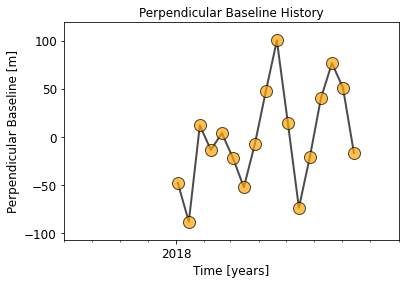

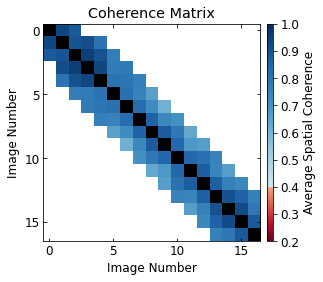

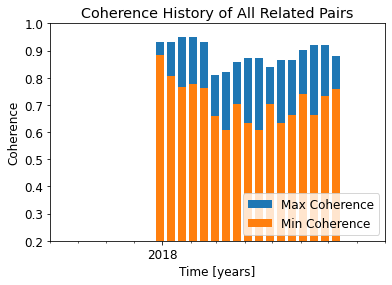

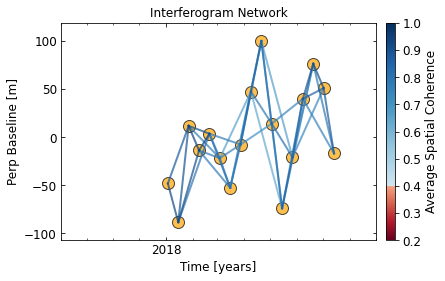

In [8]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep modify_network'
os.system(command);
plot_network.main(['inputs/ifgramStack.h5'])

### 3.2.E  Generate Quality Control Mask

Mask files can be can be used to mask pixels in the time-series processing. Below we generate a mask file based on the connected components, which is a metric for unwrapping quality.

input ifgramStack file: inputs/ifgramStack.h5
--------------------------------------------------
update mode: ON
1) output file maskConnComp.h5 already exists.
2) output file is newer than input dataset: connectComponent.
run or skip: skip.
run view.py in MintPy release version v1.3.1-12, release date 2021-08-19
input file is mask file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/maskConnComp.h5 in bool format
file size in y/x: (1177, 3061)
num of datasets in file maskConnComp.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['mask']
data   coverage in y/x: (0, 0, 3061, 1177)
subset coverage in y/x: (0, 0, 3061, 1177)
data   coverage in lat/lon: (-120.610416667, 36.75125, -118.059584354, 35.770417059)
subset coverage in lat/lon: (-120.610416667, 36.75125, -118.059584354, 35.770417059)
------------------------------------------------------------------------
colormap: jet
figure title: maskConnComp
figure size : [15.00, 4.61]
data has uniform and l

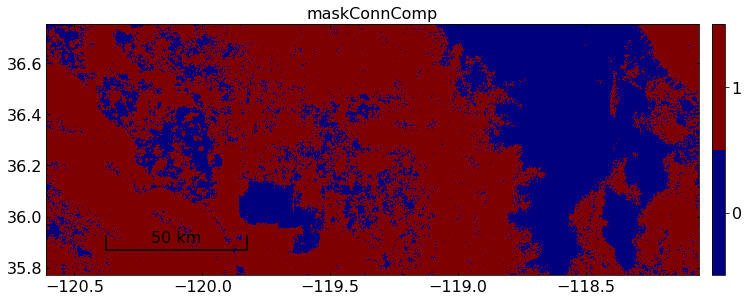

In [12]:
os.system('generate_mask.py inputs/ifgramStack.h5  --nonzero  -o maskConnComp.h5  --update');
view.main(['maskConnComp.h5'])
msk_file = os.path.join(mint_dir, 'maskTempCoh.h5')

### 3.2.F  Reference Interferograms To Common Lat/Lon

In [13]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep reference_point'
os.system(command);
os.system('info.py inputs/ifgramStack.h5 | egrep "REF_"');

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-03 15:14:35.333561--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['reference_point']
Remaining steps: ['quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/smallbaselin

### 3.2.G  Invert for SBAS Line-of-Sight Timeseries

In [14]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep invert_network'
os.system(command);

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-03 15:14:42.572008--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['invert_network']
Remaining steps: ['correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/smallbaselineApp.cfg
copy central_valley_Sen.cfg to inputs   directory fo

# 3.3 Optional Corrections
Phase distortions related to solid earth and ocean tidal effects as well as those due to temporal variations in the vertical stratification of the atmosphere can be mitigated using the approaches described below. At this point, it is expected that these corrections will not be needed to validate the mission requirements, but they may be used to produce the highest quality data products. Typically, these are applied to the estimated time series product rather than to the individual interferograms, since they are a function of the time of each radar acquisition.

### 3.3.A Solid Earth Tide Correction
[MintPy provides functionality for this correction.]

### 3.3.B Tropospheric Delay Correction
Optional atmospheric correction utilizes the PyAPS (Jolivet et al., 2011, Jolivet and Agram, 2012) module within GIAnT (or eventually a merged replacement for GIAnT and MintPy). PyAPS is well documented, maintained and can be freely downloaded. PyAPS is included in GIAnT distribution). PyAPS currently includes support for ECMWF’s ERA-Interim, NOAA’s NARR and NASA’s MERRA weather models. A final selection of atmospheric models to be used for operational NISAR processing will be done during Phase C.

[T]ropospheric delay maps are produced from atmospheric data provided by Global Atmospheric Models. This method aims to correct differential atmospheric delay correlated with the topography in interferometric phase measurements. Global Atmospheric Models (hereafter GAMs)... provide estimates of the air temperature, the atmospheric pressure and the humidity as a function of elevation on a coarse resolution latitude/longitude grid. In PyAPS, we use this 3D distribution of atmospheric variables to determine the atmospheric phase delay on each pixel of each interferogram.

The absolute atmospheric delay is computed at each SAR acquisition date. For a pixel a_i at an elevation z at acquisition date i, the four surrounding grid points are selected and the delays for their respective elevations are computed. The resulting delay at the pixel a_i is then the bilinear interpolation between the delays at the four grid points. Finally, we combine the absolute delay maps of the InSAR partner images to produce the differential delay maps used to correct the interferograms.

[MintPy provides functionality for this correction.]

### 3.3.C  Phase Deramping

In [15]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep deramp'
os.system(command);

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-03 15:15:21.010818--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['deramp']
Remaining steps: ['correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/smallbaselineApp.cfg
copy central_valley_Sen.cfg to inputs   directory for backup.
copy smallbaselineApp.cfg to inputs   directory for backup.
c

### 3.3.D Topographic Residual Correction 
[MintPy provides functionality for this correction.]

# 4.1 Decomposition of InSAR and GNSS time series into basis functions

### 4.1.A Estimate InSAR LOS Velocities
Given a time series of InSAR LOS displacements, the observations for a given pixel, $U(t)$, can be parameterized as:

$$U(t) = a \;+\; vt \;+\; c_1 cos (\omega_1t - \phi_{1,}) \;+\; c_2 cos (\omega_2t - \phi_2) \;+\; \sum_{j=1}^{N_{eq}} \left( h_j+f_j F_j (t-t_j) \right)H(t - t_j) \;+\; \frac{B_\perp (t)}{R sin \theta}\delta z \;+\; residual$$ 

which includes a constant offset $(a)$, velocity $(v)$, and amplitudes $(c_j)$ and phases $(\phi_j)$ of annual $(\omega_1)$ and semiannual $(\omega_2)$ sinusoidal terms.  Where needed we can include additional complexity, such as coseismic and postseismic processes parameterized by Heaviside (step) functions $H$ and postseismic functions $F$ (the latter typically exponential and/or logarithmic).   $B_\perp(t)$, $R$, $\theta$, and $\delta z$ are, respectively, the perpendicular component of the interferometric baseline relative to the first date, slant range distance, incidence angle and topography error correction for the given pixel. 

Thus, given either an ensemble of interferograms or the output of SBAS (displacement vs. time), we can write the LSQ problem as 

$$ \textbf{G}\textbf{m} = \textbf{d}$$

where $\textbf{G}$ is the design matrix (constructed out of the different functional terms in Equation 2 evaluated either at the SAR image dates for SBAS output, or between the dates spanned by each pair for interferograms), $\textbf{m}$ is the vector of model parameters (the coefficients in Equation 2) and $\textbf{d}$ is the vector of observations.  For GPS time series, $\textbf{G}, \textbf{d}, \textbf{m}$ are constructed using values evaluated at single epochs corresponding to the GPS solution times, as for SBAS InSAR input. 

With this formulation, we can obtain InSAR velocity estimates and their formal uncertainties (including in areas where the expected answer is zero). 

In [8]:
command = 'smallbaselineApp.py ' + config_file + ' --dostep velocity'
os.system(command);
vel_file = os.path.join(mint_dir, 'velocity.h5')
vel = readfile.read(vel_file, datasetName = 'velocity')[0] * 100.  #read and convert velocities from m to cm
# optionally set masked pixels to NaN
#msk = readfile.read(msk_file)[0]
#vel[msk == 0] = np.nan

MintPy release version v1.3.1-12, release date 2021-08-19
--RUN-at-2022-02-08 14:44:12.656030--
Current directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
Run routine processing with smallbaselineApp.py on steps: ['velocity']
Remaining steps: ['geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: central_valley_Sen
Go to work directory: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy
read custom template file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/central_valley_Sen.cfg
update default template based on input custom template
No new option value found, skip updating /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/smallbaselineApp.cfg
copy central_valley_Sen.cfg to inputs   directory for backup.
copy smallbaselineApp.cfg to inputs   directory for backup.
copy central_valley_Sen.cfg to pic      directory for backup.
copy 

run view.py in MintPy release version v1.3.1-12, release date 2021-08-19
input file is velocity file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/velocity.h5 in float32 format
file size in y/x: (1177, 3061)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file velocity.h5: 2
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 3061, 1177)
subset coverage in y/x: (0, 0, 3061, 1177)
data   coverage in lat/lon: (-120.610416667, 36.75125, -118.059584354, 35.770417059)
subset coverage in lat/lon: (-120.610416667, 36.75125, -118.059584354, 35.770417059)
------------------------------------------------------------------------
colormap: RdBu
figure title: LOS_Velocity
figure size : [15.00, 4.61]
read mask from file: maskTempCoh.h5
set reference pixel to: [200, 1450]
data    range: [-27.590298, 20.297955] cm/year
display range: [-25.0, 25.0] cm/year
display data in transparency: 1

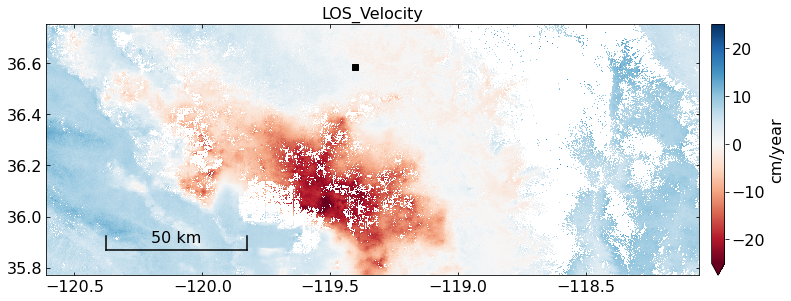

In [18]:
scp_args = 'velocity.h5 velocity -v -25 25 --ref-yx 200 1450 --colormap RdBu --figtitle LOS_Velocity' # --plot-setting ' + plot_config_file
view.main(scp_args.split())

<div class="alert alert-info">
<b>Note :</b> 
Negative values indicates that target is moving away from the radar (i.e., Subsidence in case of vertical deformation).
Positive values indicates that target is moving towards the radar (i.e., uplift in case of vertical deformation). 
</div>

### 4.1.B Find Collocated GNSS Stations
The project will have access to L2 position data for continuous GNSS stations in third-party networks such NSF’s Plate Boundary Observatory, the HVO network for Hawaii, GEONET-Japan, and GEONET-New Zealand, located in target regions for NISAR solid earth calval. Station data will be post-processed by one or more analysis centers, will be freely available, and will have latencies of several days to weeks, as is the case with positions currently produced by the NSF’s GAGE Facility and separately by the University of Nevada Reno. Networks will contain one or more areas of high-density station coverage (2~20 km nominal station spacing over 100 x 100 km or more) to support validation of L2 NISAR requirements at a wide range of length scales.

In [12]:
# get analysis metadata from InSAR velocity file
atr = readfile.read_attribute(vel_file)
length, width = int(atr['LENGTH']), int(atr['WIDTH'])
lat_step = float(atr['Y_STEP'])
lon_step = float(atr['X_STEP'])
N = float(atr['Y_FIRST'])
W = float(atr['X_FIRST'])
S = N + lat_step * length
E = W + lon_step * width
start_date = atr.get('START_DATE', None)
end_date = atr.get('END_DATE', None)
start_date_gnss = dt.strptime(start_date, "%Y%m%d")
end_date_gnss = dt.strptime(end_date, "%Y%m%d")
inc_angle = int(float(atr.get('incidenceAngle', None)))
az_angle = int(float(atr.get('azimuthAngle', None))) 

#Set GNSS Parameters
gps_completeness_threshold = 0.9     #0.9  #percent of data timespan with valid GNSS epochs
gps_residual_stdev_threshold = 10. #0.03  #0.03  #max threshold standard deviation of residuals to linear GNSS fit

In [13]:
# search for collocated GNSS stations
site_names, site_lats, site_lons = gps.search_gps(SNWE=(S,N,W,E), start_date=start_date, end_date=end_date)
print("Initial list of {} stations used in analysis:".format(len(site_names)))
print(site_names)

Initial list of 54 stations used in analysis:
['BEPK' 'CACO' 'CAFP' 'CAHA' 'CAKC' 'CAND' 'CARH' 'CAWO' 'CRCN' 'DONO'
 'GR8R' 'HELB' 'HOGS' 'HUNT' 'KENN' 'LAND' 'LEMA' 'LONP' 'LOWS' 'MASW'
 'MIDA' 'MNMC' 'MULN' 'P056' 'P281' 'P282' 'P283' 'P292' 'P293' 'P294'
 'P296' 'P297' 'P298' 'P300' 'P304' 'P465' 'P467' 'P531' 'P540' 'P546'
 'P547' 'P566' 'P571' 'P572' 'P573' 'P789' 'P790' 'PKDB' 'POMM' 'RAPT'
 'RNCH' 'TBLP' 'TRAN' 'WLHG']


### 4.1.C Get GNSS Position Time Series

In [14]:
# get daily position solutions for GNSS stations
use_stn = []  #stations to keep
bad_stn = []  #stations to toss
use_lats = [] 
use_lons = []
counter = 0

for stn in site_names:
    gps_obj = GPS(site = stn, data_dir = mint_dir + 'GPS')
    gps_obj.open()
    
    # count number of dates in time range
    dates = gps_obj.dates
    range_days = (end_date_gnss - start_date_gnss).days
    gnss_count = np.histogram(dates, bins=[start_date_gnss,end_date_gnss])
    gnss_count = int(gnss_count[0])
    
    # get standard deviation of residuals to linear fit
    disp_los = ut.enu2los(gps_obj.dis_e, gps_obj.dis_n, gps_obj.dis_u, inc_angle, az_angle)
    #disp_los = ut.enu2los(gps_obj.dis_e, gps_obj.dis_n, gps_obj.dis_u, inc_angle, head_angle, az_angle)
    disp_detrended = signal.detrend(disp_los)
    stn_stdv = np.std(disp_detrended)
   
    # select GNSS stations based on data completeness and scatter of residuals
    disp_detrended = signal.detrend(disp_los)
    if range_days*gps_completeness_threshold <= gnss_count:
        if stn_stdv > gps_residual_stdev_threshold:
            bad_stn.append(stn)
        else:
            use_stn.append(stn)
            use_lats.append(site_lats[counter])
            use_lons.append(site_lons[counter])
    else:
        bad_stn.append(stn)
    counter+=1

site_names = use_stn
site_lats = use_lats
site_lons = use_lons

calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction
calculating station lat/lon
reading time and displacement in east/north/vertical direction

In [15]:
# [optional] manually remove additional stations
#site_names.remove('P294')
print("Final list of {} stations used in analysis:".format(len(site_names)))
print(site_names)
print("List of {} stations removed from analysis".format(len(bad_stn)))
print(bad_stn)

Final list of 48 stations used in analysis:
['BEPK', 'CACO', 'CAFP', 'CAHA', 'CAKC', 'CAND', 'CARH', 'CRCN', 'GR8R', 'HOGS', 'HUNT', 'LAND', 'LEMA', 'LOWS', 'MASW', 'MIDA', 'MNMC', 'MULN', 'P056', 'P281', 'P282', 'P283', 'P292', 'P293', 'P294', 'P296', 'P297', 'P298', 'P300', 'P304', 'P465', 'P467', 'P531', 'P540', 'P546', 'P547', 'P566', 'P571', 'P572', 'P573', 'P789', 'P790', 'POMM', 'RAPT', 'RNCH', 'TBLP', 'TRAN', 'WLHG']
List of 6 stations removed from analysis
['CAWO', 'DONO', 'HELB', 'KENN', 'LONP', 'PKDB']


### 4.1.D Make GNSS LOS Velocities

In [16]:
gps_comp = 'enu2los'
site_vels = gps.get_gps_los_obs(
    insar_file=vel_file,
    site_names=site_names,
    start_date=start_date,
    end_date=end_date,
    gps_comp=gps_comp,
    redo=True) * 100.
print(site_vels)

calculating GPS LOS observation ...
use incidence / azimuth angle from file: geometryGeo.h5
[==================================================] 48/48 WLHG   17s /     0s 
write GPS LOS observations to file: /Users/aborsa/Dropbox/missions/nisar/jupyter/calval/central_valley/MintPy/gps_enu2los.csv
[ -0.968318    -1.6142123  -12.543058   -14.536583    -2.3121045
  -1.6355184   -1.8082323  -25.664946    -0.6993218   -1.8760893
  -1.504398    -2.229472   -15.154193    -2.631595    -2.167513
  -1.6161144   -1.0576897   -7.638164    -7.1159167   -1.737738
  -1.3908919   -0.68001115  -0.8917569   -0.7425979   -0.8528402
  -0.81307197  -2.2781713   -0.7375931   -0.7826399   -2.7639422
  -0.55699915  -0.85391796  -2.377953    -1.1514943   -0.6033028
  -1.0980382   -2.7802935   -1.0048516   -1.6214328   -1.0194398
  -0.7311534   -1.716838    -2.2550128    0.31853193  -3.4538877
  -1.5507214   -5.222282    -1.0140443 ]


### 4.1.E  Re-Reference GNSS and InSAR LOS Velocities

In [17]:
gps_ref_site_name = 'P467'

# reference GNSS stations to GNSS reference site
ref_site_ind = site_names.index(gps_ref_site_name)
site_vels = site_vels - site_vels[ref_site_ind]

# reference InSAR to GNSS reference site
ref_site_lat = float(site_lats[ref_site_ind])
ref_site_lon = float(site_lons[ref_site_ind])
ref_y, ref_x = ut.coordinate(atr).geo2radar(ref_site_lat, ref_site_lon)[:2]
vel = vel - vel[ref_y, ref_x]

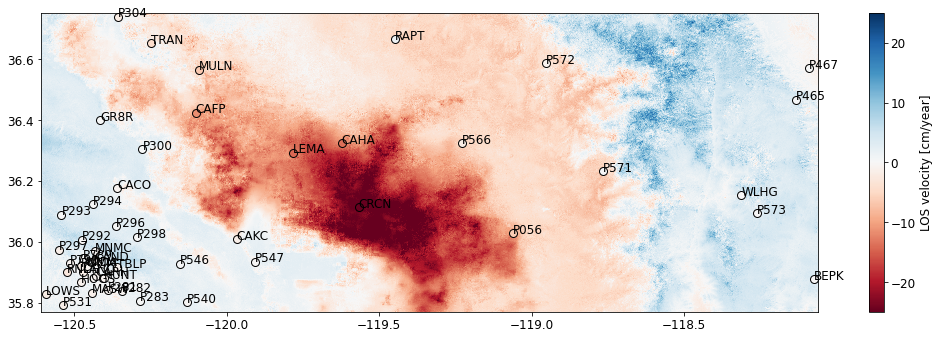

In [18]:
# plot GNSS stations on InSAR velocity field
vmin, vmax = -25, 25
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(figsize=[18, 5.5])
img1 = ax.imshow(vel, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='nearest', extent=(W, E, S, N))
cbar1 = fig.colorbar(img1, ax=ax)
cbar1.set_label('LOS velocity [cm/year]')

for lat, lon, obs in zip(site_lats, site_lons, site_vels):
    color = cmap((obs - vmin)/(vmax - vmin))
    ax.scatter(lon, lat, color=color, s=8**2, edgecolors='k')
for i, label in enumerate(site_names):
     plt.annotate(label, (site_lons[i], site_lats[i]), color='black')

out_fig = os.path.abspath('vel_insar_vs_gnss.png')
fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)

# 4.2 NISAR Validation: GNSS-InSAR Direct Comparision

### 4.2.A Make Velocity Residuals at GNSS Locations

In [93]:
#Set Parameters
pixel_radius = 5   #number of InSAR pixels to average for comparison with GNSS

#Create dictionary with the stations as the key and all their info as an array 
stn_dict = {}  

#Loop over GNSS station locations
for i in range(0,len(site_names)): 
    
    # convert GNSS station lat/lon information to InSAR x/y grid
    stn_lat = site_lats[i]
    stn_lon = site_lons[i]
    x_value = round((stn_lon - W)/lon_step)
    y_value = round((stn_lat - N)/lat_step)
    
    # get velocities and residuals
    vel_GPS = site_vels[i]
    #Caution: If you expand the radius parameter farther than the bounding grid it will break. 
    #To fix, remove the station in section 4 when the site_names list is filtered
    vel_px_rad = vel[y_value-pixel_radius:y_value+1+pixel_radius, 
                     x_value-pixel_radius:x_value+1+pixel_radius]
    vel_InSAR = np.median(vel_px_rad)
    residual = vel_GPS - vel_InSAR

    # populate data structure
    values = [x_value, y_value, vel_InSAR, vel_GPS, residual, stn_lat, stn_lon]
    stn = site_names[i]
    stn_dict[stn] = values
    
# extract data from structure
res_list = []
insar_vel = []
gnss_vel = []
lat_list = []
lon_list = []
for i in range(len(site_names)): 
    stn = site_names[i]
    insar_vel.append(stn_dict[stn][2])
    gnss_vel.append(stn_dict[stn][3])
    res_list.append(stn_dict[stn][4])
    lat_list.append(stn_dict[stn][5])
    lon_list.append(stn_dict[stn][6])
num_stn = len(site_names) 

### 4.2.B Make Double-Differenced Velocity Residuals

In [94]:
diff_res_list = []
stn_dist_list = []
dict_keys = list(stn_dict.keys())

# remove reference stn
site_names_analysis = list(site_names)
#site_names_analysis.remove(gps_ref_site_name)

# loop over stations
for i in range(len(site_names_analysis)-1):
    stn1 = dict_keys[i]
    for l in range(i + 1, len(dict_keys)):
        stn2 = dict_keys[l]
        # calculate between-station velocity residual
        # stn_dict values = [x_value, y_value, vel_InSAR, vel_GPS, residual, stn_lat, stn_lon]
        # index 3 = gps vel
        gps_vel_diff = stn_dict[stn1][3] - stn_dict[stn2][3]
        # index 2 = insar vel 
        insar_vel_diff = stn_dict[stn1][2]-stn_dict[stn2][2]
        # calculate double-difference
        diff_res = gps_vel_diff - insar_vel_diff
        diff_res_list.append(diff_res)
        # get distance between selected station
        # index 5 is lat, 6 is lon
        dlat = (stn_dict[stn1][5]-stn_dict[stn2][5])
        dlon = (stn_dict[stn1][6]-stn_dict[stn2][6])*np.sin(stn_dict[stn1][5])
        #convert degrees to km
        stn_dist = math.sqrt(dlat**2 + dlon**2)*111
        stn_dist_list.append(stn_dist)

### 4.2.C Compare Raw Velocities

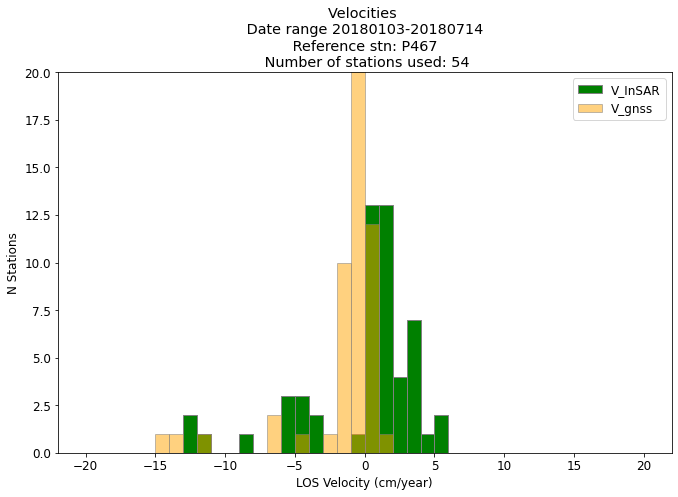

In [95]:
vmin, vmax = -20, 20
plt.figure(figsize=(11,7))
plt.hist(insar_vel, range = [vmin, vmax],bins = 40, color = "green",edgecolor='grey',label='V_InSAR')
plt.hist(gnss_vel, range = [vmin, vmax],bins = 40, color = "orange",edgecolor='grey',label='V_gnss', alpha=0.5)
plt.legend(loc='upper right')
plt.title(f"Velocities \n Date range {start_date}-{end_date} \n Reference stn: {gps_ref_site_name} \n Number of stations used: {num_stn}")
plt.xlabel('LOS Velocity (cm/year)')
plt.ylabel('N Stations')
plt.ylim(0,20)
plt.show()

### 4.2.D Plot Velocity Residuals

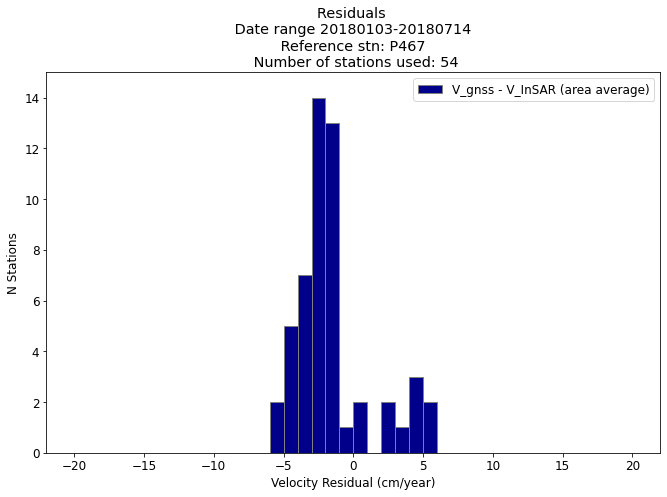

In [96]:
plt.figure(figsize=(11,7))
plt.hist(res_list,bins = 40, range = [vmin, vmax],edgecolor='grey',color="darkblue",linewidth=1,label='V_gnss - V_InSAR (area average)')
plt.legend(loc='upper right')
plt.title(f"Residuals \n Date range {start_date}-{end_date} \n Reference stn: {gps_ref_site_name} \n Number of stations used: {num_stn}")
plt.xlabel('Velocity Residual (cm/year)')
plt.ylabel('N Stations')
plt.ylim(0,15)
plt.show()

### 4.2.E Plot Double Difference Residuals

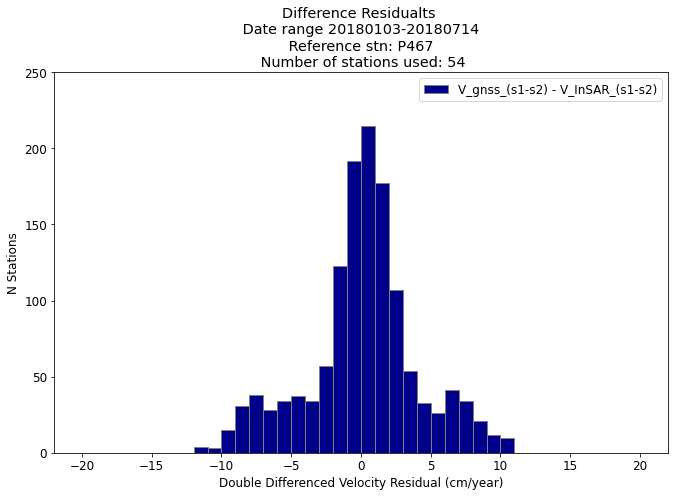

In [97]:
plt.figure(figsize=(11,7))
plt.hist(diff_res_list, range = [vmin, vmax],bins = 40, color = "darkblue",edgecolor='grey',label='V_gnss_(s1-s2) - V_InSAR_(s1-s2)')
plt.legend(loc='upper right')
plt.title(f"Difference Residualts \n Date range {start_date}-{end_date} \n Reference stn: {gps_ref_site_name} \n Number of stations used: {num_stn}")
plt.xlabel('Double Differenced Velocity Residual (cm/year)')
plt.ylabel('N Stations')
plt.ylim(0,250)
plt.show()

## 4.2.F Amplitude vs. Distance of Double Differences (not quite a structure function)

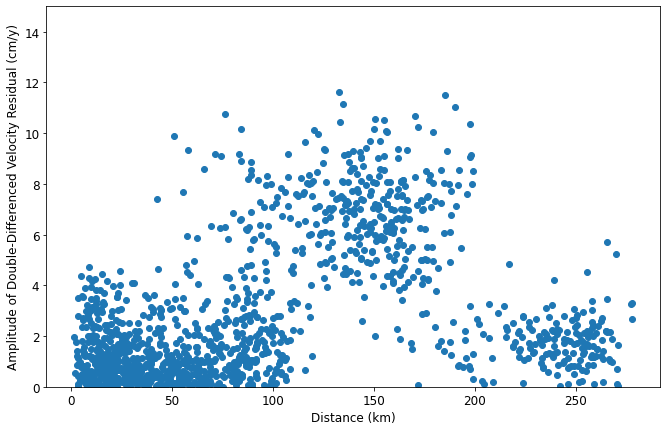

In [98]:
plt.figure(figsize=(11,7))
plt.scatter(stn_dist_list,np.abs(diff_res_list))
plt.ylim(0,15)
plt.xlabel("Distance (km)")
plt.ylabel("Amplitude of Double-Differenced Velocity Residual (cm/y)")
plt.show()

# 4.2 NISAR Validation: GNSS-InSAR Direct Comparison

# Appendix: GPS Position Plots

calculating station lat/lon
reading time and displacement in east/north/vertical direction


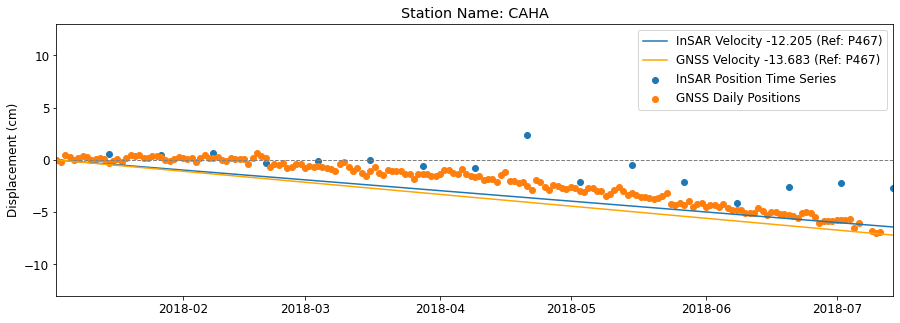

In [210]:
#Read in timeseries file
time_file = os.path.join(work_dir, 'MintPy/timeseries.h5')
insar_displacements = readfile.read(time_file, datasetName='timeseries')[0] * 100.

#Get aquisition dates, trim the str, and convert to datetime
raw_aqu_list = readfile.get_slice_list(time_file)
aquitisions_dates = []
for i in range(len(raw_aqu_list)):
    date = raw_aqu_list[i].split("-")
    #aqu_dates.append = date[1]
    aquitisions_dates.append(dt.strptime(date[1], "%Y%m%d"))
ndates = len(aquitisions_dates)

#Plot displacements and velocity timeseries at GNSS station locations
#test_list = site_names
test_list = ['CAHA'] #', 'CAHA', 'CAKC', 'CAND', 'CARH'] #for testing, remove after
for stn in test_list:
    
    #InSAR Info
    insar_timeseries = []
    stn_x = (stn_dict[stn][0])
    stn_y = (stn_dict[stn][1])
    for i in range(ndates):
        insar_displacement = insar_displacements[i,stn_y,stn_x]
        insar_timeseries.append(insar_displacement)     
    InSAR_stn_vel = stn_dict[stn][2]
    GNSS_stn_vel = stn_dict[stn][3]
    #print(InSAR_stn_vel)
    #print(GNSS_stn_vel)
    
    #get the length of time between first and last interferogram for velocity plotting
    insar_timespan = aquitisions_dates[ndates - 1] - aquitisions_dates[0]
    conversion = insar_timespan.days/365
   
    #Plot InSAR
    plt.figure(figsize=(15,5))  
    plt.plot([0,100000],[0,0], color='grey',linestyle='dashed',linewidth=1)
    plt.scatter(aquitisions_dates, insar_timeseries, label="InSAR Position Time Series")
    #velocity trendline
    plt.plot([aquitisions_dates[0], aquitisions_dates[ndates - 1]],[0,conversion*InSAR_stn_vel],label=f"InSAR Velocity {InSAR_stn_vel:.3f} (Ref: {gps_ref_site_name})")

    #GNSS Info
    gps_obj = GPS(site = stn, data_dir = mint_dir + 'GPS')
    gps_obj.open()
    dates = gps_obj.dates
    head_angle = 90 - az_angle
    disp_los = ut.enu2los(gps_obj.dis_e, gps_obj.dis_n, gps_obj.dis_u, inc_angle, head_angle, az_angle)
    
    #Plot GNSS
    index_begin = np.min(np.where(dates >= start_date_gnss))
    index_end = np.max(np.where(dates <= end_date_gnss))
    dates_cut = dates[index_begin:index_end]
    disp_los_cut = disp_los[index_begin:index_end]
    disp_los_cut = (disp_los_cut - np.median(disp_los_cut))*100
    plt.scatter(dates_cut, disp_los_cut - disp_los_cut[0], label="GNSS Daily Positions")   
    #velocity trendline
    plt.plot([aquitisions_dates[0], aquitisions_dates[ndates - 1]],[0,conversion*GNSS_stn_vel],color='orange',label=f"GNSS Velocity {GNSS_stn_vel:.3f} (Ref: {gps_ref_site_name})")

    plt.title(f"Station Name: {stn}") 
    plt.ylabel('Displacement (cm)')
    plt.ylim(-13,13)
    plt.xlim(aqu_dates_convert[0],aqu_dates_convert[ndates - 1])
    plt.legend(loc="best")
    